<a href="https://colab.research.google.com/github/irasin/pytroch_test/blob/master/081214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch torchvision

    100% |████████████████████████████████| 591.8MB 28kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61cee000 @  0x7f748ed5e2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 22.1MB/s 
    100% |████████████████████████████████| 2.0MB 4.5MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
train = FashionMNIST('data/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())

test = FashionMNIST('data/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

Processing...
Done!


In [0]:
train_loader = DataLoader(train, batch_size=128, shuffle=True)
test_loader = DataLoader(test, batch_size=128, shuffle=False)

In [0]:
class FlattenLayer(nn.Module):
    def forward(self, x):
        batch_size = x.size()[0]
        return x.view(batch_size, -1)


cnn = nn.Sequential(
    nn.Conv2d(1, 32, 5),
    nn.MaxPool2d(2),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.Dropout2d(0.25),
    nn.Conv2d(32, 64, 5),
    nn.MaxPool2d(2),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.Dropout2d(0.25),
    FlattenLayer()
    )

test_input = torch.ones(1, 1, 28, 28)
cnn_output_size = cnn(test_input).size()[-1]
cnn_output_size

mlp = nn.Sequential(
    nn.Linear(cnn_output_size, 200),
    nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Dropout(0.25),
    nn.Linear(200, 10)
    )

net = nn.Sequential(
    cnn,
    mlp
    )

def eval_net(net, dataloader, device='cpu'):
    net.to(device)
    net.eval()
    y_reals = []
    y_preds = []
    for x, y in dataloader:
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():
            _, y_pred = torch.max(net(x), 1)
        y_reals.append(y)
        y_preds.append(y_pred)
    y_reals = torch.cat(y_reals)
    y_preds = torch.cat(y_preds)
    accuracy = (y_reals == y_preds).float().sum() / len(y_reals)
    return accuracy.item()

def train_net(net, train_loader, test_loader, optimizer=optim.Adam, criterion=nn.CrossEntropyLoss(),epoch=10, device='cpu'):
    train_losses = []
    train_acc = []
    val_acc = []
    net.to(device)
    opt = optimizer(net.parameters())
    def _update(optimizer, loss):
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    for _ in range(epoch):
        net.train()
        y_reals = []
        y_preds = []
        for x, y in tqdm(train_loader):
            x = x.to(device)
            y = y.to(device)
            h = net(x)
            loss = criterion(h, y)
            _update(opt, loss)
            train_losses.append(loss.item())
            _, y_pred = h.max(1)
            y_reals.append(y)
            y_preds.append(y_pred)
        y_reals = torch.cat(y_reals)
        y_preds = torch.cat(y_preds)
        train_acc.append((y_reals == y_preds).float().sum() / len(y_reals))
        val_acc.append(eval_net(net, test_loader, device))
        print(f'train_acc: {train_acc[-1]}, val_acc:{val_acc[-1]}')

    plt.plot(train_losses, label='train_loss')
    plt.legend()
    plt.show()

    plt.plot(train_acc, c='r', label='train_acc')
    plt.plot(val_acc, c='b', label='val_acc')
    plt.legend()
    plt.show()

  1%|          | 5/469 [00:00<00:10, 42.38it/s]

train_acc: 0.8371166586875916, val_acc:0.8805999755859375


  1%|          | 5/469 [00:00<00:10, 42.97it/s]

train_acc: 0.8841000199317932, val_acc:0.8942999839782715


  1%|          | 5/469 [00:00<00:10, 42.57it/s]

train_acc: 0.8970000147819519, val_acc:0.9023000001907349


  1%|          | 4/469 [00:00<00:12, 38.27it/s]

train_acc: 0.9044666886329651, val_acc:0.9025999903678894


  1%|          | 5/469 [00:00<00:10, 43.19it/s]

train_acc: 0.9101833701133728, val_acc:0.9074999690055847


  1%|          | 5/469 [00:00<00:10, 42.81it/s]

train_acc: 0.9120500087738037, val_acc:0.9089999794960022


  1%|          | 5/469 [00:00<00:10, 42.91it/s]

train_acc: 0.9188166856765747, val_acc:0.9099999666213989


  1%|          | 5/469 [00:00<00:10, 42.23it/s]

train_acc: 0.9209499955177307, val_acc:0.9156000018119812


  1%|          | 5/469 [00:00<00:11, 41.54it/s]

train_acc: 0.9237499833106995, val_acc:0.9162999987602234


  1%|          | 5/469 [00:00<00:10, 42.66it/s]

train_acc: 0.9260166883468628, val_acc:0.9138999581336975


  1%|          | 5/469 [00:00<00:10, 43.13it/s]

train_acc: 0.9281833171844482, val_acc:0.9164999723434448


  1%|          | 5/469 [00:00<00:10, 43.38it/s]

train_acc: 0.9297666549682617, val_acc:0.9162999987602234


  1%|          | 5/469 [00:00<00:10, 42.77it/s]

train_acc: 0.931950032711029, val_acc:0.9213999509811401


  1%|          | 5/469 [00:00<00:11, 41.13it/s]

train_acc: 0.9349166750907898, val_acc:0.9196999669075012


  1%|          | 5/469 [00:00<00:10, 42.48it/s]

train_acc: 0.93545001745224, val_acc:0.9197999835014343


  1%|          | 5/469 [00:00<00:11, 40.03it/s]

train_acc: 0.9375500082969666, val_acc:0.9208999872207642


  1%|          | 5/469 [00:00<00:10, 43.19it/s]

train_acc: 0.9393166899681091, val_acc:0.9195999503135681


  1%|          | 5/469 [00:00<00:10, 42.42it/s]

train_acc: 0.9414666891098022, val_acc:0.9192999601364136


  1%|          | 4/469 [00:00<00:11, 39.28it/s]

train_acc: 0.9425333142280579, val_acc:0.9221999645233154


100%|██████████| 469/469 [00:10<00:00, 43.34it/s]


train_acc: 0.9432500004768372, val_acc:0.9212999939918518


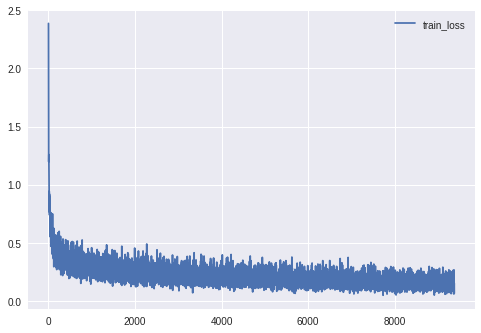

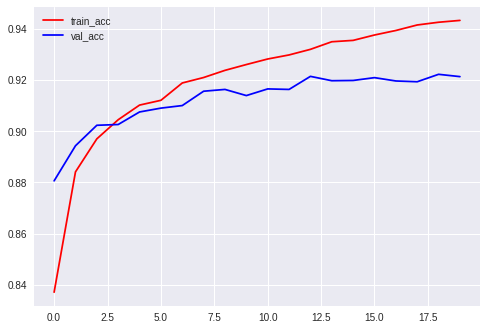

In [7]:
train_net(net, train_loader, test_loader, epoch=20, device='cuda:0')